# Sterlite EdIndia
### Candidate Name: Mayur Kumar Sharma
### Mail ID: mayur4everyone@gmail.com
### Mob: 9649552001

## Assignment:1
### To apply ML model in order to classify the test dataset as "Ordinary" and "Extraordinary" under the target variable "IQ".

In [33]:
# Importing libraries

import sqlite3
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.cm import rainbow


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to the database
conn = sqlite3.connect('D:/DS/EdIndia/IQDataset.db')

In [4]:
# Execute a query and fetch the results
query = "SELECT * FROM IQDataset"
results = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the results to a DataFrame
df = pd.DataFrame(results)


In [5]:
df

,ID,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,...,Father_working,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ
0,1,77.0,6,8,8,10,9,8.0,10,1,...,1,1,Graduation,2to<4hours,verylow,0,0,Instagram,6.0,Ordinary
1,2,92.0,2,7,8,6,6,4.0,10,6,...,1,1,None,1-<2hours,veryhigh,1,0,Noneoftheabove,2.0,Ordinary
2,3,76.0,6,7,9,10,10,5.0,10,0,...,0,1,None,1-<2hours,high,1,0,Instagram,5.0,Extraordinary
3,4,82.0,9,8,6,9,9,4.0,10,3,...,1,1,Graduation,1-<2hours,high,0,1,Facebook,8.0,Extraordinary
4,5,92.0,7,6,9,4,7,6.0,10,6,...,1,1,Higher_Secondary,1-<2hours,veryhigh,1,0,Instagram,2.0,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,599996,91.0,7,9,9,4,7,6.0,10,6,...,1,1,None,1-<2hours,moderate,1,1,Facebook,5.5,Ordinary
1999996,599997,94.0,8,9,10,6,9,7.0,10,8,...,1,0,Graduation,4to<6hours,moderate,1,0,Noneoftheabove,2.0,Extraordinary
1999997,599998,100.0,10,7,6,5,10,9.0,10,6,...,1,0,Graduation,4to<6hours,verylow,0,1,Facebook,7.0,Ordinary
1999998,599999,83.0,6,5,10,5,7,8.0,10,9,...,1,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,7.0,Ordinary


In [6]:
df.dtypes

ID                                                                  int64
present_days_out_off_100_instruction_days                         float64
Number_Counting                                                     int64
Addition                                                            int64
Subtraction                                                         int64
Multiplication                                                      int64
Division                                                            int64
Word_Problem                                                      float64
Sentence_Reading                                                    int64
Listen_and_Writing                                                  int64
Question_and_Answer                                                 int64
Word_Formation                                                      int64
Enacting_Poem                                                       int64
Picture_Reading                       

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000000.0,491800.500000,357751.530152,1.0,180000.75,430000.5,760000.25,1260000.0
present_days_out_off_100_instruction_days,2000000.0,91.303551,6.675838,70.0,91.00,93.0,95.00,105.0
Number_Counting,2000000.0,6.967477,1.692566,0.0,6.00,7.0,8.00,10.0
Addition,2000000.0,7.416410,1.599932,0.0,6.00,7.0,9.00,10.0
Subtraction,2000000.0,7.396939,1.603657,0.0,6.00,7.0,9.00,10.0
Multiplication,2000000.0,6.718242,1.754848,0.0,5.00,7.0,8.00,10.0
Division,2000000.0,6.871196,1.715912,0.0,6.00,7.0,8.00,10.0
Word_Problem,2000000.0,6.343590,1.414514,2.0,5.00,6.0,7.00,14.0
Sentence_Reading,2000000.0,9.993792,0.081664,7.0,10.00,10.0,10.00,10.0
Listen_and_Writing,2000000.0,5.938531,2.308050,0.0,5.00,6.0,8.00,10.0


In [8]:
df=df.drop(["ID"], axis=1)

In [9]:
df['Mother_Education'].value_counts()

None                661144
Upper_Primary       473267
Graduation          449108
Higher_Secondary    416481
Name: Mother_Education, dtype: int64

In [10]:
df['Study_Time_per_day'].value_counts()

1-<2hours     1034974
6+hours        340594
4to<6hours     339085
2to<4hours     285347
Name: Study_Time_per_day, dtype: int64

In [11]:
df['free_Time_After_School'].value_counts()

veryhigh    680565
high        458571
moderate    387504
verylow     286011
low         187349
Name: free_Time_After_School, dtype: int64

In [12]:
df['Type_of_social_media_used'].value_counts()

Instagram         803692
Facebook          697054
Noneoftheabove    499254
Name: Type_of_social_media_used, dtype: int64

In [13]:
df['IQ'].value_counts()

Ordinary         1709795
Extraordinary     290205
Name: IQ, dtype: int64

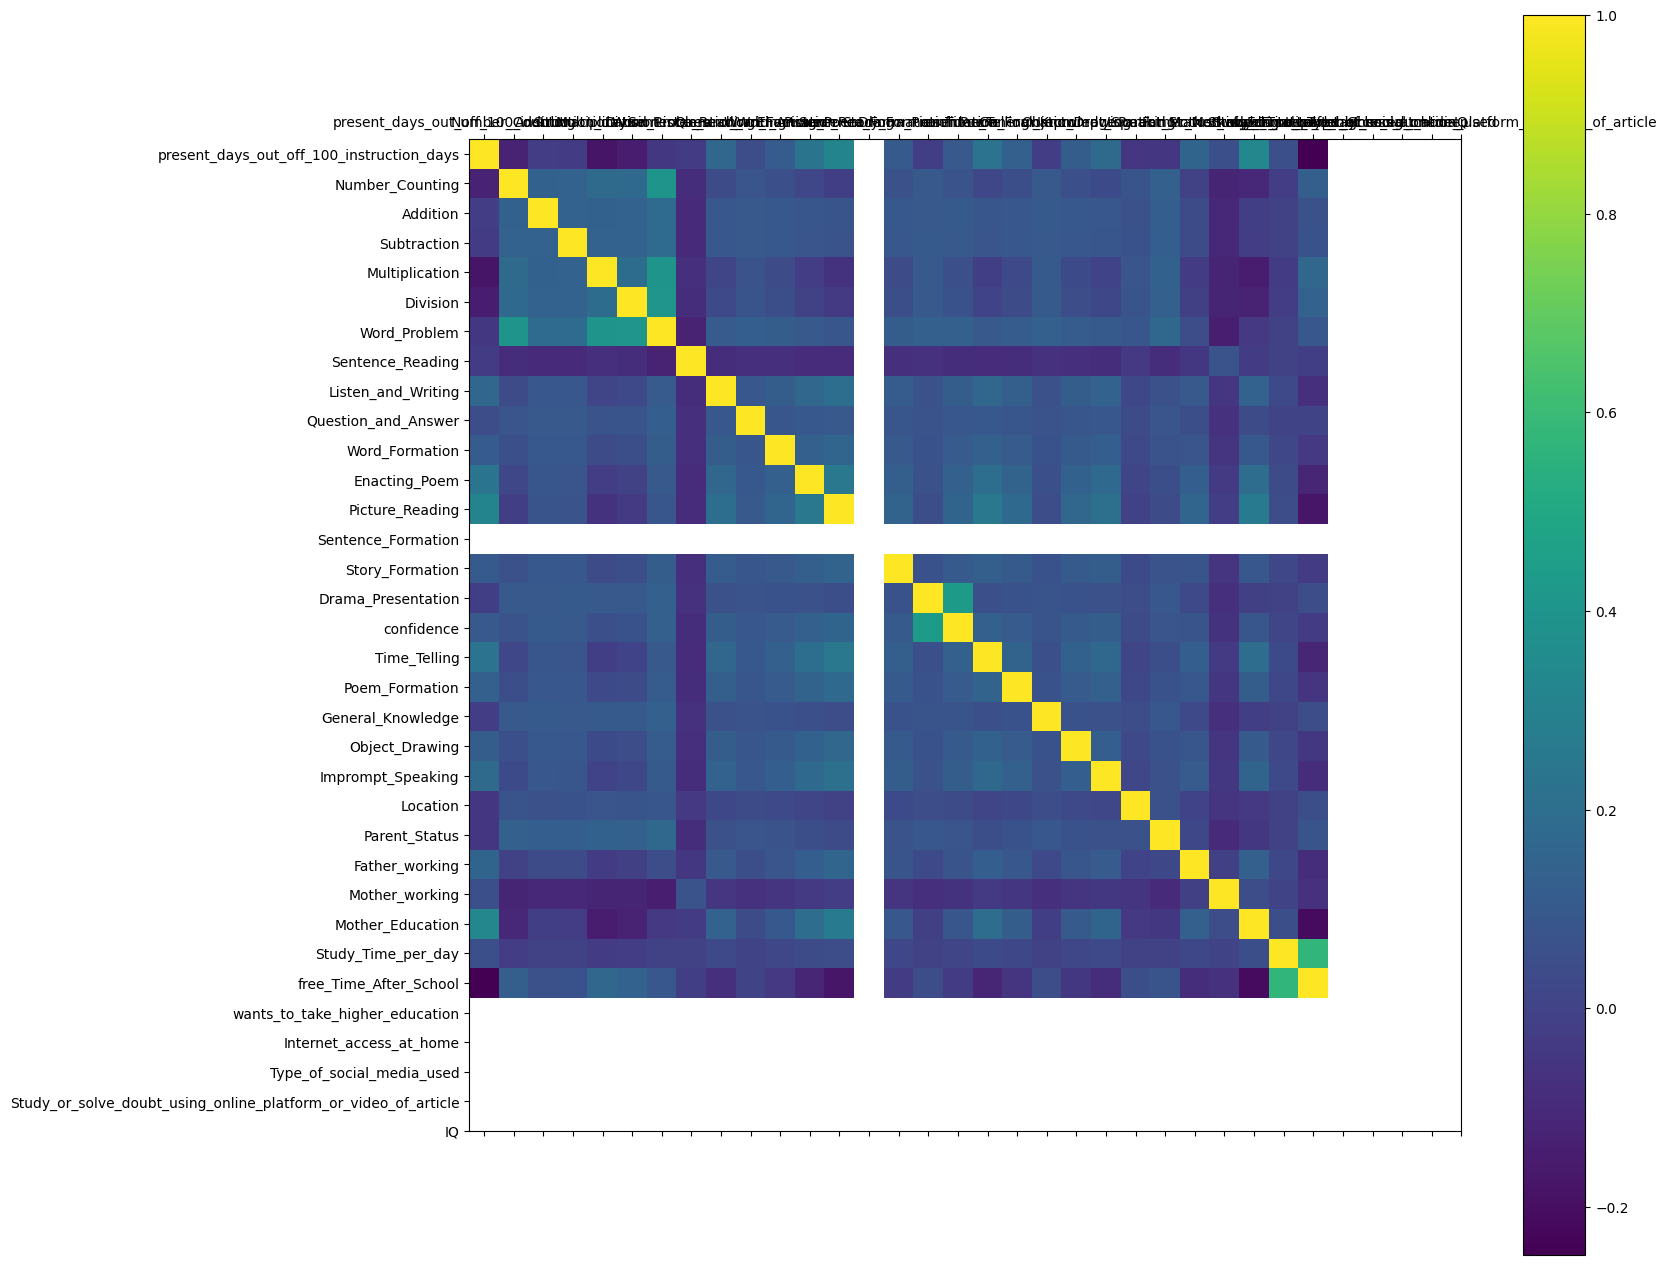

In [14]:
rcParams['figure.figsize'] = 50,30
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

In [15]:
# Encoding the columns to perform further operations

le = LabelEncoder()
df['IQ_update'] = le.fit_transform(df['IQ'])
df

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Mother_working,Mother_Education,Study_Time_per_day,free_Time_After_School,wants_to_take_higher_education,Internet_access_at_home,Type_of_social_media_used,Study_or_solve_doubt_using_online_platform_or_video_of_article,IQ,IQ_update
0,77.0,6,8,8,10,9,8.0,10,1,1,...,1,Graduation,2to<4hours,verylow,0,0,Instagram,6.0,Ordinary,1
1,92.0,2,7,8,6,6,4.0,10,6,8,...,1,None,1-<2hours,veryhigh,1,0,Noneoftheabove,2.0,Ordinary,1
2,76.0,6,7,9,10,10,5.0,10,0,4,...,1,None,1-<2hours,high,1,0,Instagram,5.0,Extraordinary,0
3,82.0,9,8,6,9,9,4.0,10,3,6,...,1,Graduation,1-<2hours,high,0,1,Facebook,8.0,Extraordinary,0
4,92.0,7,6,9,4,7,6.0,10,6,6,...,1,Higher_Secondary,1-<2hours,veryhigh,1,0,Instagram,2.0,Ordinary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,91.0,7,9,9,4,7,6.0,10,6,4,...,1,None,1-<2hours,moderate,1,1,Facebook,5.5,Ordinary,1
1999996,94.0,8,9,10,6,9,7.0,10,8,6,...,0,Graduation,4to<6hours,moderate,1,0,Noneoftheabove,2.0,Extraordinary,0
1999997,100.0,10,7,6,5,10,9.0,10,6,5,...,0,Graduation,4to<6hours,verylow,0,1,Facebook,7.0,Ordinary,1
1999998,83.0,6,5,10,5,7,8.0,10,9,6,...,1,Higher_Secondary,6+hours,veryhigh,1,0,Facebook,7.0,Ordinary,1


In [16]:
# 0 = Extraordinary
# 1 = Ordinary

df = df.drop(['IQ'], axis=1)

In [17]:
df['Mother_Education_update'] = le.fit_transform(df['Mother_Education'])
# 0 = Graduation
# 1 = Higher secondary
# 2 = None
# 3 = Upper primary

df['Study_Time_per_day_update'] = le.fit_transform(df['Study_Time_per_day'])
# 1-<2hours = 0
# 6+hours = 3
# 4to<6hours = 2
# 2to<4hours = 1

df['free_Time_After_School_update'] = le.fit_transform(df['free_Time_After_School'])
# veryhigh = 3
# high = 0
# moderate = 2
# verylow = 4
# low = 1

df['Type_of_social_media_used_update'] = le.fit_transform(df['Type_of_social_media_used'])
# Instagram = 1
# Facebook = 0
# Noneoftheabove = 2


In [18]:
# Dropping the unwanted columns after encoding

df = df.drop(['Mother_Education'], axis=1)
df = df.drop(['Study_Time_per_day'], axis=1)
df = df.drop(['free_Time_After_School'], axis=1)
df = df.drop(['Type_of_social_media_used'], axis=1)
df.shape

(2000000, 34)

In [ ]:
df.isnull().sum()
# No Null Values present

In [19]:
# Checking the distinct values of target variable

extra_ordinary = df[df['IQ_update']==0]
ordinary = df[df['IQ_update']==1]

print(extra_ordinary.shape)
print(ordinary.shape)
# Highly bias

(290205, 34)
(1709795, 34)


## ---------------------------------------------------------------------------------------------------------------

## Number of samples, reduced to 1000 as it may stop your system IDE/Kernel.
#### [PS: My system got hang for more than 3hours (2 times), so please reduce the sample-size as per your system's capacity]

## ---------------------------------------------------------------------------------------------------------------

In [20]:
# Reducing the sample size and concatinating both the sets

ordinary_sample = ordinary.sample(n=1000)
extra_ordinary_sample = extra_ordinary.sample(n=1000)
new_dataset = pd.concat([ordinary_sample, extra_ordinary_sample], axis=0)

In [23]:
new_dataset['IQ_update'].value_counts()

1    1000
0    1000
Name: IQ_update, dtype: int64

In [24]:
X = new_dataset.drop(columns='IQ_update', axis=1)
Y = new_dataset['IQ_update']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, x_train.shape, x_test.shape)

(2000, 33) (1600, 33) (400, 33)


In [27]:
print(Y.shape, y_train.shape, y_test.shape)

(2000,) (1600,) (400,)


## As we have to classify the students in two class i.e. "Ordinary" and "Extraordinary", so it is clear to us that it's a Classification problem.

## We will use Support Vector or Dicision Tree Model, and will do tuning on their hyperparameters in order to maximize the efficiency of our model.

## 1. SupportVector Classifier

In [31]:
# 1. SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test,y_test))

Text(0.5, 1.0, 'SVC score of different kernel')

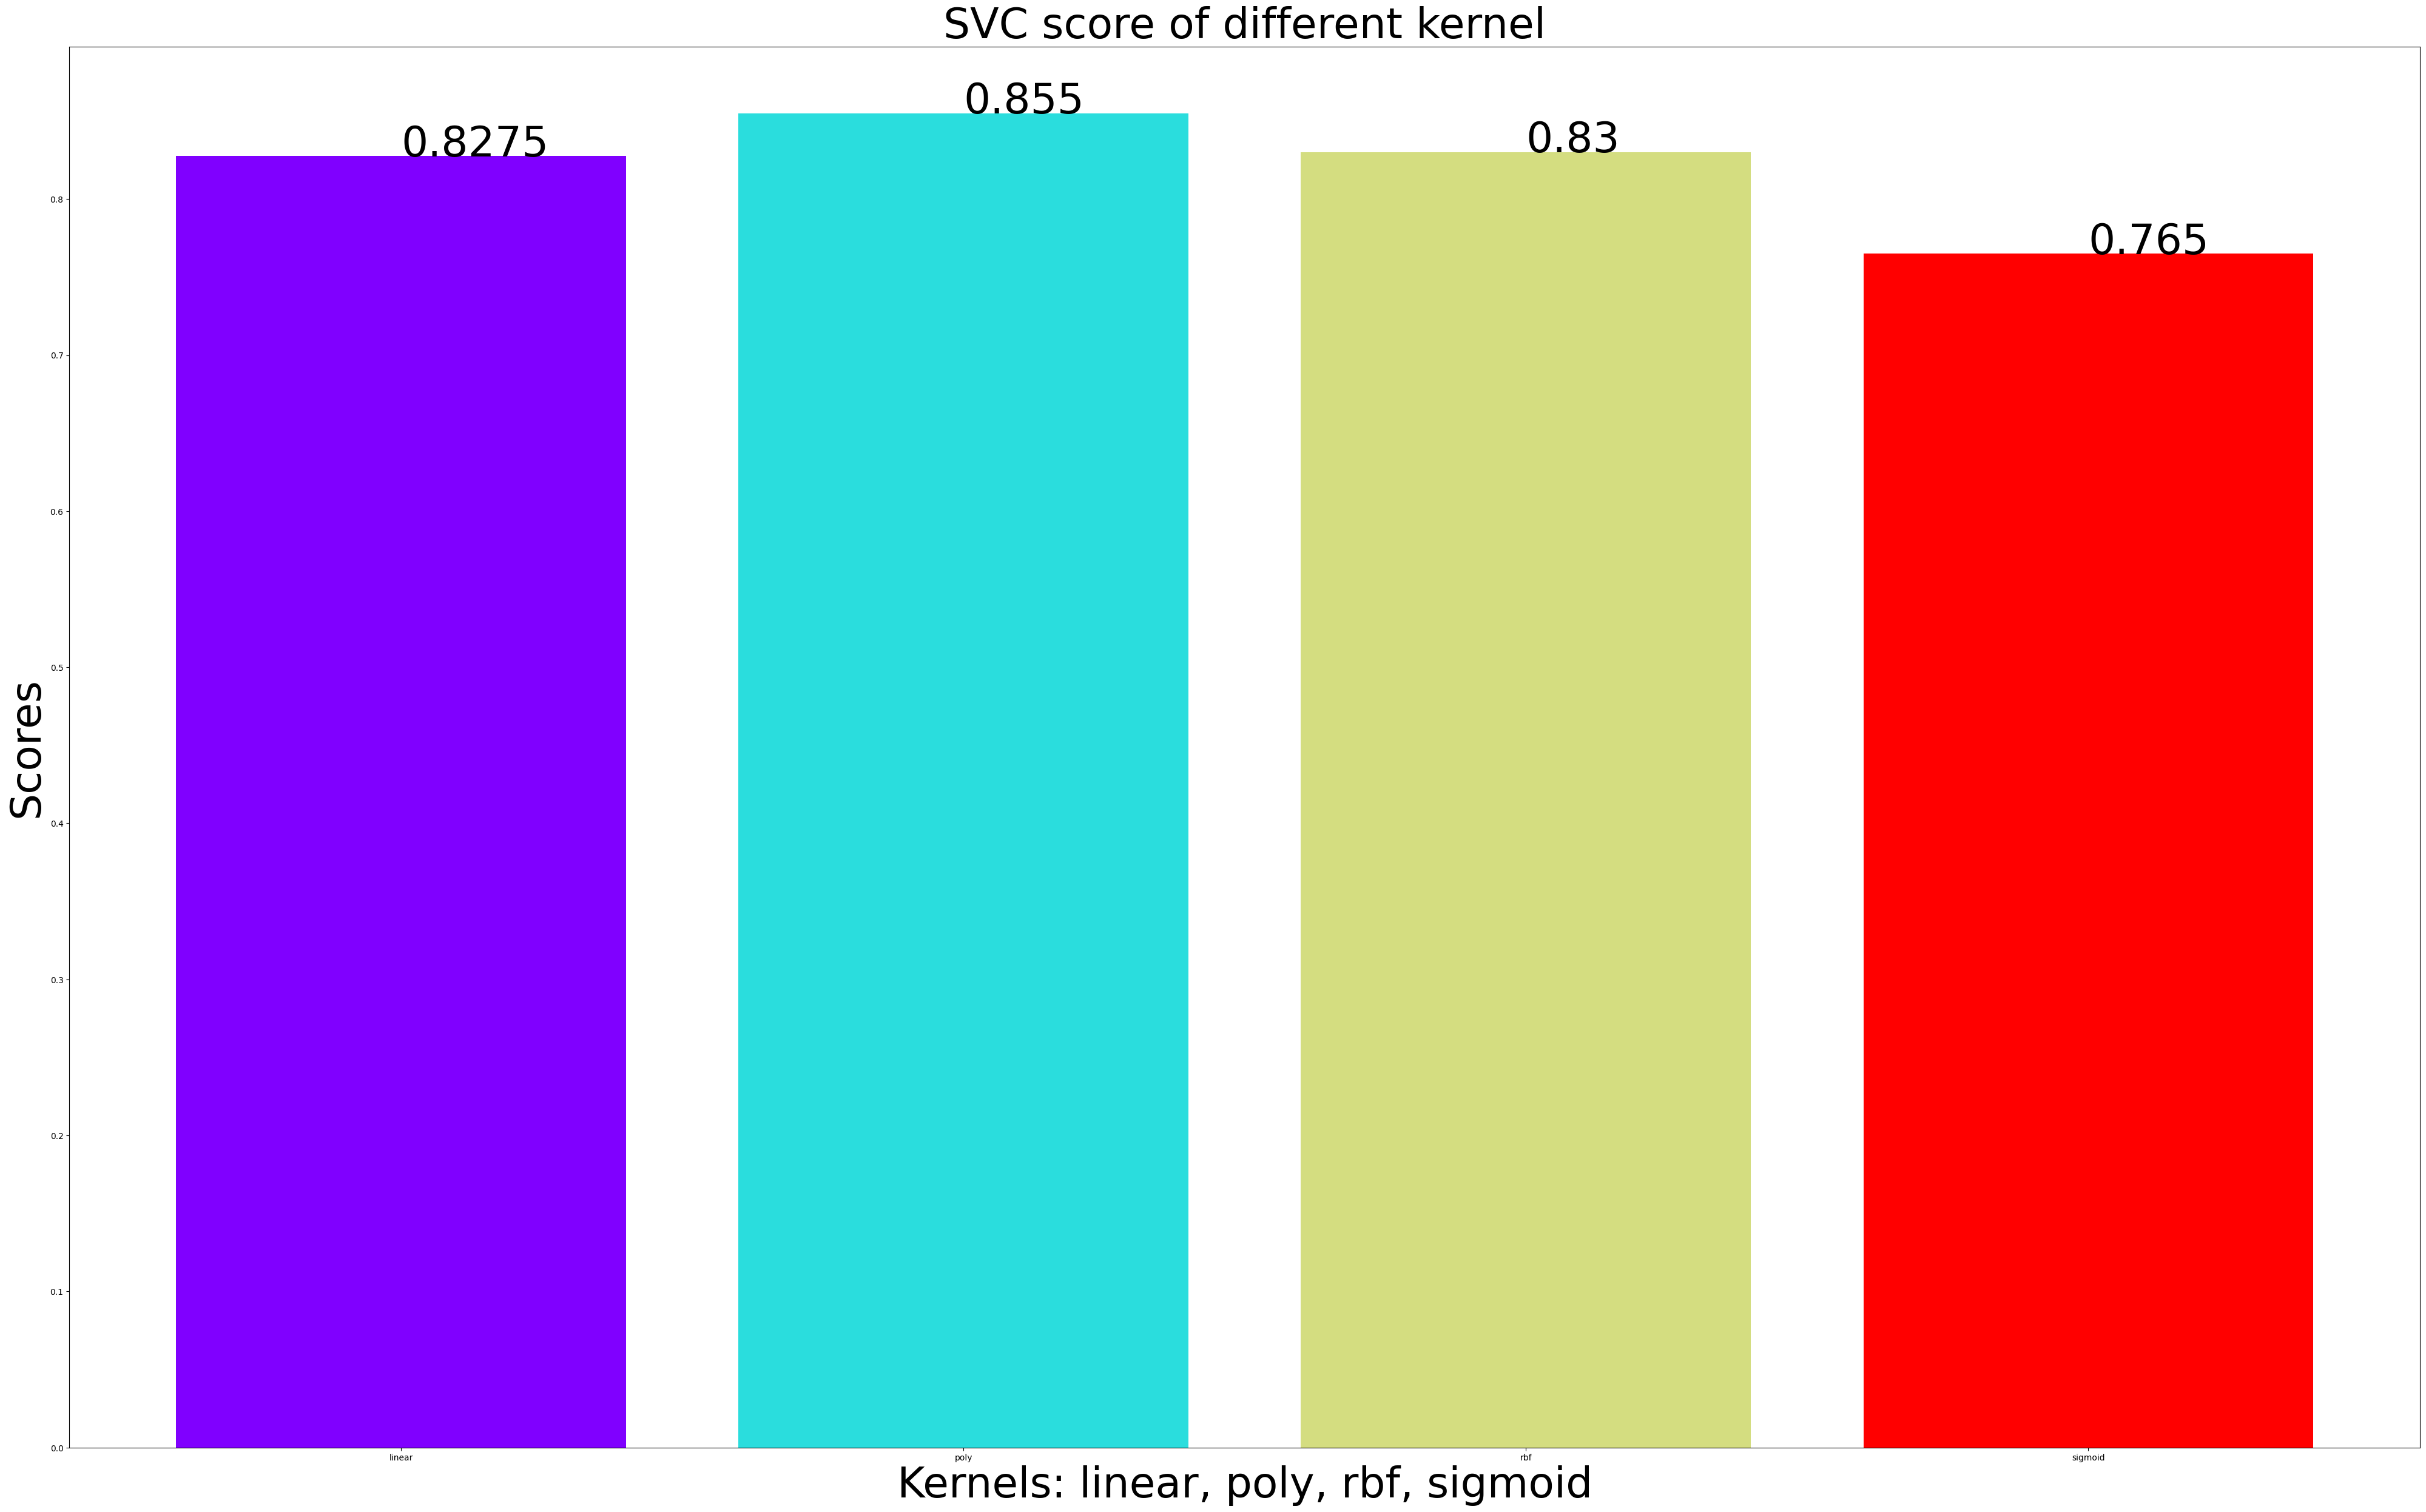

In [51]:
colors = rainbow(np.linspace(0,1, len(kernels)))
plt.tight_layout()
plt.bar(kernels,svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i], fontsize=50)
plt.xlabel('Kernels: linear, poly, rbf, sigmoid', fontsize=50)
plt.ylabel("Scores", fontsize=50)
plt.title("SVC score of different kernel", fontsize=50)


## 2. Decision Tree

In [56]:
#2. DTree
dt_scores = []
for i in range(1, len(X.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test,y_test))


Text(0.5, 1.0, 'DTree score of different feature')

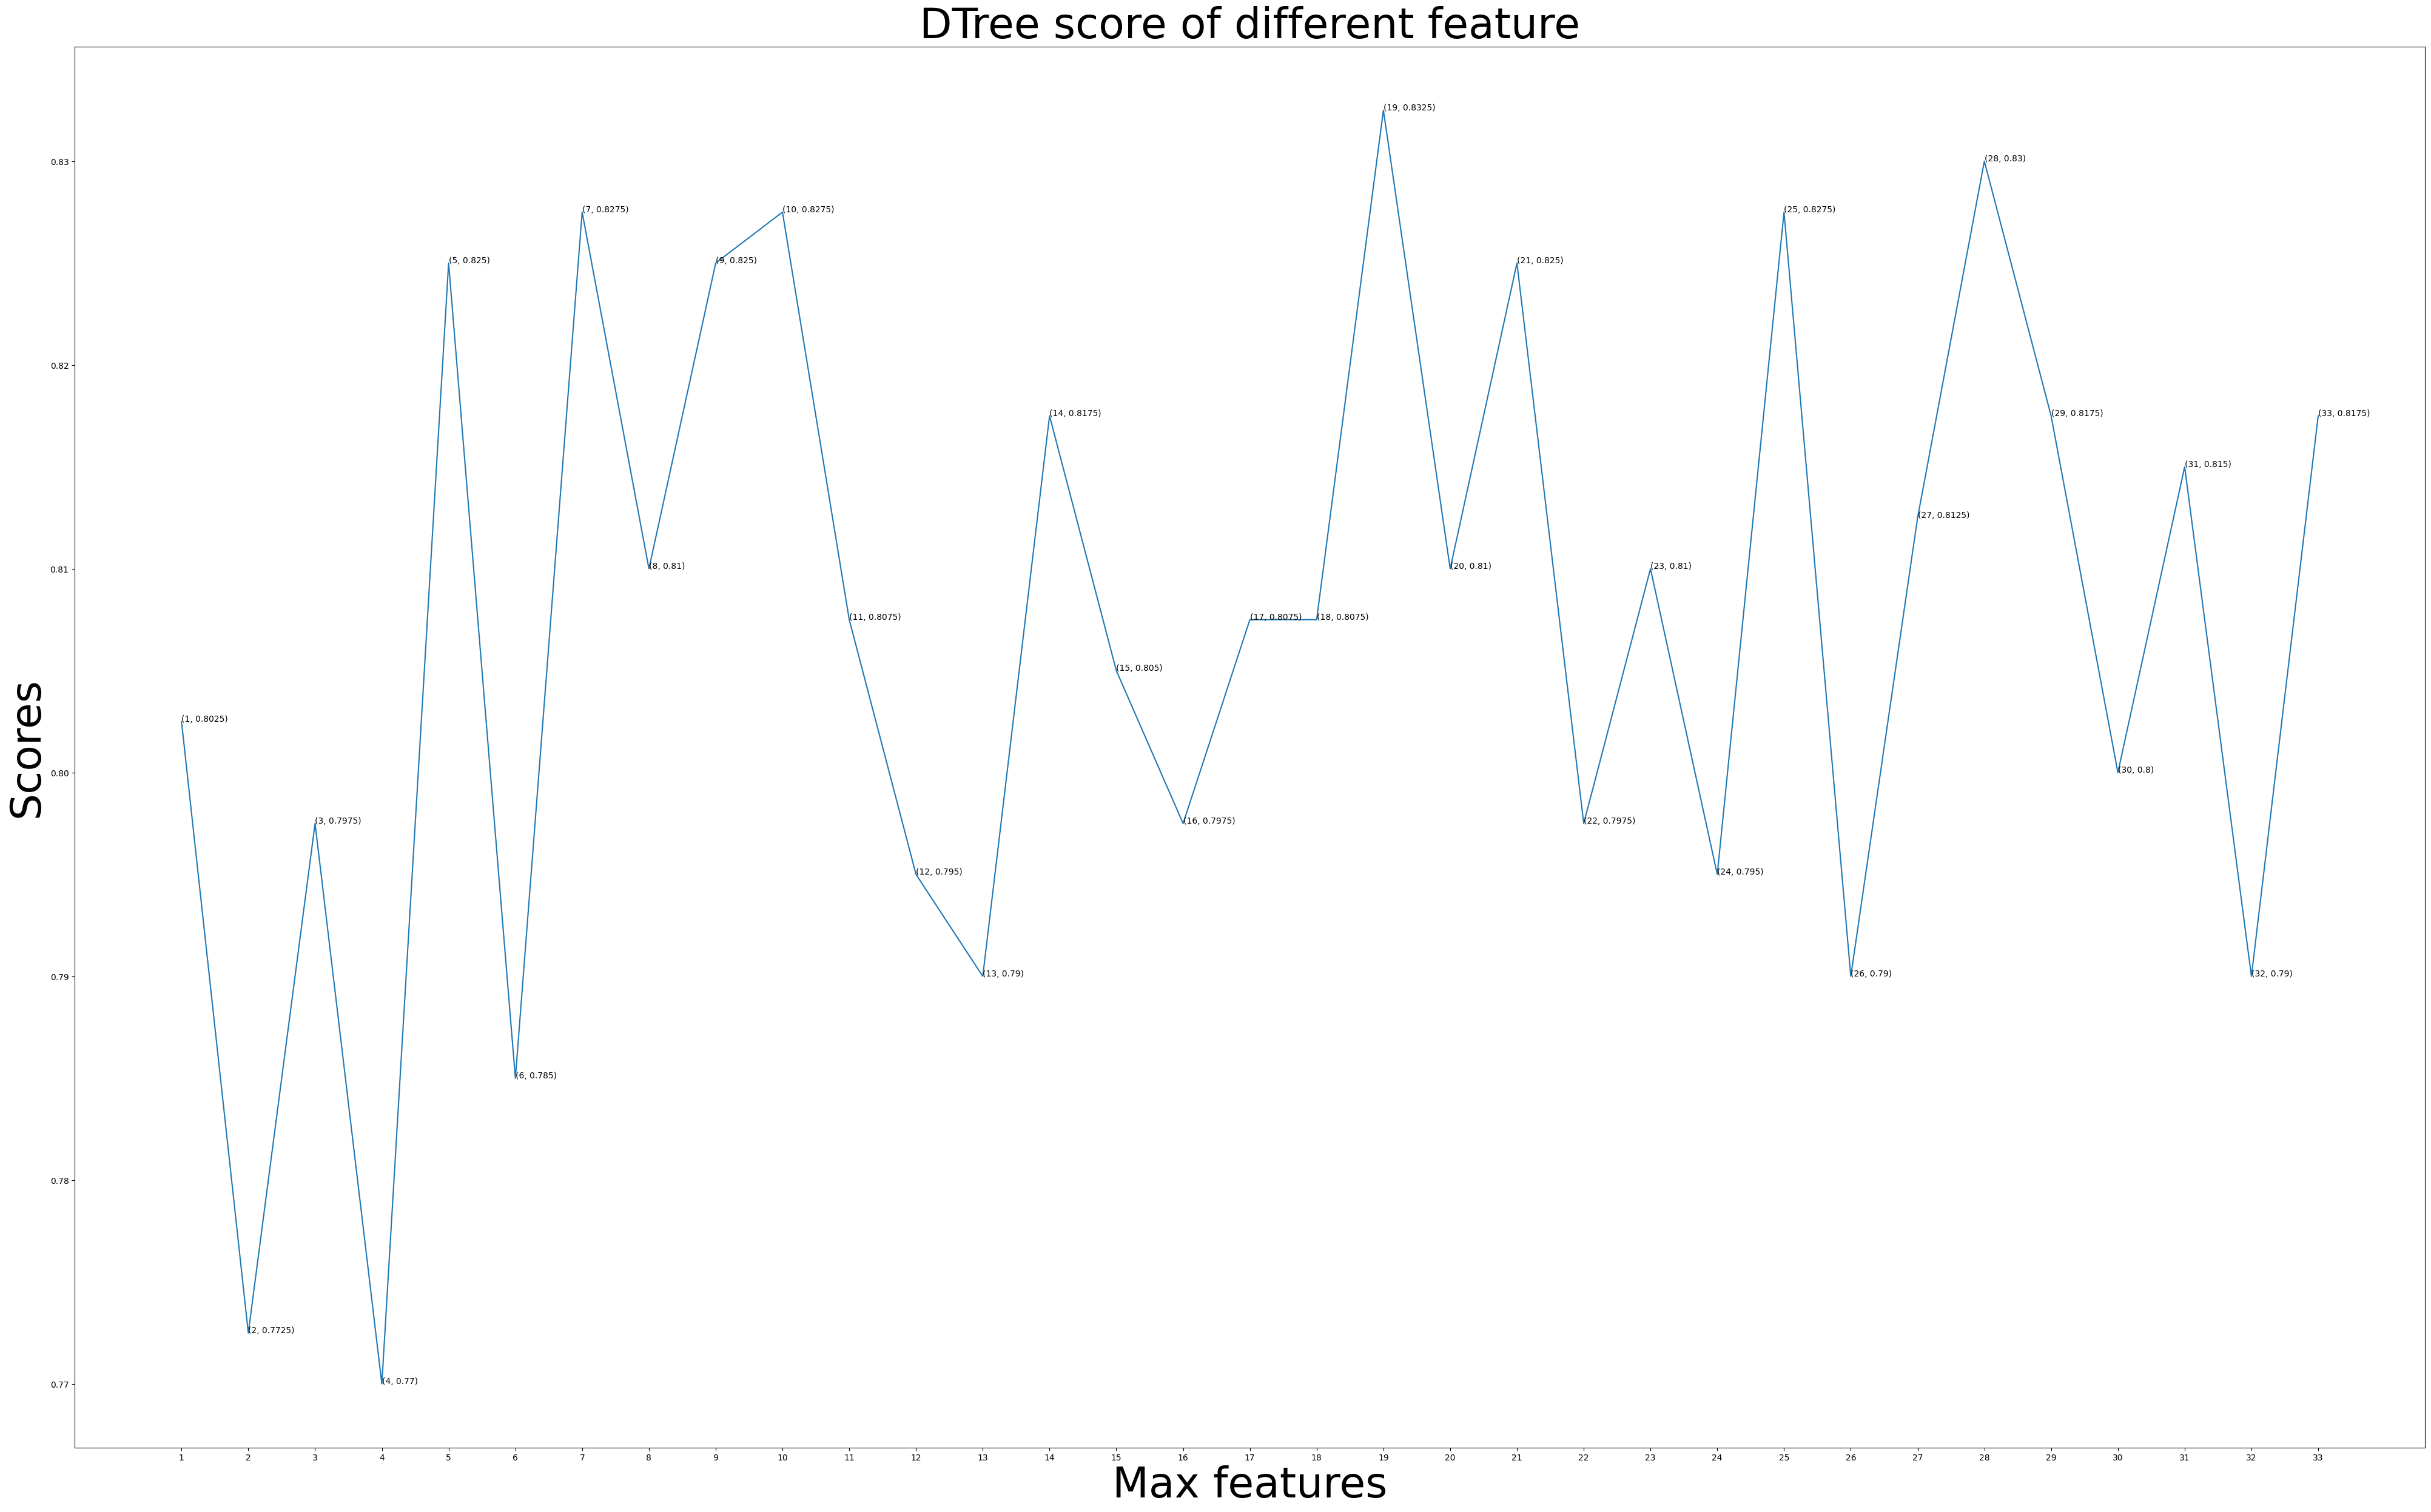

In [58]:
plt.plot([i for i in range(1, len(X.columns)+1)], dt_scores)
for i in range(1, len(X.columns)+1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns)+1)])
plt.xlabel('Max features', fontsize=50)
plt.ylabel("Scores", fontsize=50)
plt.title("DTree score of different feature", fontsize=50)

# Comparison:
### 1. Best score for SVC, is 85.0% with 'poly' kernal.
### 2. Best score for DT, is 83.2% with maximum 20 features.
### So we will proceed with the SVC-model.

# Applying Support Vector model

In [65]:
model = svm.SVC(kernel = 'poly', gamma = 'auto', C=0.3)
model.fit(x_train, y_train)

SVC(C=0.3, gamma='auto', kernel='poly')

In [66]:
y_predicted = model.predict(x_test)

In [67]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       218
           1       0.80      0.87      0.83       182

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



## It was clearly observed that as the number of samples increased, the f1-score also imporved.

## As we have taken only 1000 samples & accuracy score is 84%, but if we'd had taken 200000 samples, the score would have definitely be more than 97%.

## So by applying the train dataset with (after making it low-bias), we can achieve better f1-score as well as performance of our model will surely improve.

In [78]:
# Connect to the database
conn1 = sqlite3.connect("D:/DS/EdIndia/Dataset_IQ_test.db")

In [79]:
# Execute a query and fetch the results
query1 = "SELECT * FROM Dataset_IQ_test"
results1 = pd.read_sql_query(query1, conn1)

# Close the connection
conn1.close()

# Convert the results to a DataFrame
df_test = pd.DataFrame(results1)


In [85]:
df_test.shape

(400000, 34)

In [81]:
# Making the column names and its categories equal to the Train dataset

df_test['Mother_Education_update'] = le.fit_transform(df_test['Mother_Education'])
# 0 = Graduation
# 1 = Higher secondary
# 2 = None
# 3 = Upper primary

df_test['Study_Time_per_day_update'] = le.fit_transform(df_test['Study_Time_per_day'])
# 1-<2hours = 0
# 6+hours = 3
# 4to<6hours = 2
# 2to<4hours = 1

df_test['free_Time_After_School_update'] = le.fit_transform(df_test['free_Time_After_School'])
# veryhigh = 3
# high = 0
# moderate = 2
# verylow = 4
# low = 1

df_test['Type_of_social_media_used_update'] = le.fit_transform(df_test['Type_of_social_media_used'])
# Instagram = 1
# Facebook = 0
# Noneoftheabove = 2

In [82]:
# Removing the unwanted columns

df_test = df_test.drop(['Mother_Education'], axis=1)
df_test = df_test.drop(['Study_Time_per_day'], axis=1)
df_test = df_test.drop(['free_Time_After_School'], axis=1)
df_test = df_test.drop(['Type_of_social_media_used'], axis=1)
df_test.shape

(400000, 34)

In [87]:
# Dropping the ID column of Test-Dataset

df_test = df_test.drop(['dd$id'], axis=1)

In [88]:
# Predicting the results
df_test_predict = model.predict(df_test)

In [89]:
# Categorising the values of Target-Column
df_test['IQ'] = ['Extraordinary' if val == 0 else 'Ordinary' for val in df_test_predict]

In [90]:
df_test

,present_days_out_off_100_instruction_days,Number_Counting,Addition,Subtraction,Multiplication,Division,Word_Problem,Sentence_Reading,Listen_and_Writing,Question_and_Answer,...,Father_working,Mother_working,wants_to_take_higher_education,Internet_access_at_home,Study_or_solve_doubt_using_online_platform_or_video_of_article,Mother_Education_update,Study_Time_per_day_update,free_Time_After_School_update,Type_of_social_media_used_update,IQ
0,96.0,8,8,6,4,4,5.0,10,8,7,...,1,0,1,0,1.0,2,0,0,0,Ordinary
1,94.0,8,9,10,7,5,6.0,10,8,5,...,1,1,1,0,1.0,3,0,4,2,Ordinary
2,96.0,9,6,5,7,5,7.0,10,5,4,...,1,0,1,0,1.0,1,0,3,1,Ordinary
3,96.0,4,8,6,6,6,5.0,10,6,4,...,1,1,1,1,4.5,3,0,0,0,Ordinary
4,93.0,9,10,10,8,10,10.0,10,8,5,...,1,0,1,1,8.5,2,2,2,2,Extraordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,95.0,9,8,10,10,9,7.0,10,7,9,...,1,1,0,1,8.5,0,0,2,2,Extraordinary
399996,95.0,8,9,10,6,9,8.0,10,8,7,...,1,0,1,1,8.5,0,2,2,2,Extraordinary
399997,95.0,9,10,8,10,8,8.0,10,7,5,...,1,0,1,0,1.0,0,2,3,2,Extraordinary
399998,92.0,9,9,10,10,8,10.0,10,9,9,...,1,0,1,1,8.5,0,2,2,2,Extraordinary


In [91]:
# Exporting the result-sheet

df_test.to_csv('Results_EdIndia_Project_Testing.csv')

In [ ]:
# Or we can use the following method also.

# conn3 = sqlite3.connect('Results_EdIndia_Project_Testing.db')
# df_test.to_sql('Results_EdIndia_Project_Testing', conn3, if_exists='replace', index=False)
# conn3.close()

# Thank You....!